In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import sqlite3

from yahoo_finance import Share
from __future__ import division
from datetime import datetime
%matplotlib inline

In [264]:
#EP_List = pd.read_csv("EP_List.csv", header= 0)
EP_List =['SE','MUR', 'NBL', 'NFX', 'OAS', 'OXY', 'PDCE', 'PE', 'PHX', 'PRAH', 'PXD', 'QEP', 'REI', 'REN', 'RICE', 'RRC','RSPP', 'SE' ,'MTDR', 'AM', 'APA', 'APC', 'AR', 'AXAS', 'BBG', 'CDEV', 'CEO', 'CHK', 'CLR','D', 'DNR','HK', 'KOS', 'LPI', 'MRO','SWN', 'UNT', 'USO', 'VET', 'VNOM', 'WLL', 'WPX','WTI', 'XEC','CNQ', 'COG', 'CPG', 'CRC', 'CXO','DVN','SGY', 'SM','CRZO', 'SN', 'SPY']
EP_List.sort()

In [273]:
stock = Share('SE') 
hist_quotes = stock.get_historical('2016-05-02','2017-05-02')

In [274]:
l_date = []
l_open = []
l_high = []
l_low = []
l_close = []
l_volume = []
    # reverse the list
hist_quotes.reverse()
for quotes in hist_quotes:
        l_date.append(quotes['Date'])
        l_open.append(float(quotes['Open']))
        l_high.append(float(quotes['High']))
        l_low.append(float(quotes['Low']))
        l_close.append(float(quotes['Close']))
        l_volume.append(int(quotes['Volume']))

In [275]:
prices_table_combined= pd.DataFrame({"date":l_date,"symbol": "SE", "open" :l_open, "high":l_high,"low":l_low, 
                            "close":l_close,"volume":l_volume})

In [272]:
# CLEAN THIS CODE BLOCK WHEN COMPLETED ... 
#prices_table_combined1[prices_table_combined1.symbol == "D"]
#prices_table_combined1 = prices_table_combined
#for idx, val in enumerate(prices_table_combined1['symbol'] =="D"):
#    print (idx)
#prices_table_combined1= prices_table_combined1.drop(prices_table_combined1[prices_table_combined1.symbol == "D"])
prices_table_combined1= prices_table_combined1[prices_table_combined1.symbol != 'SE']
#prices_table_combined1.drop('symbol' =='D', axis=1)
#prices_table_combined2= prices_table_combined1.drop(prices_table_combined1.symbol == "D")
#prices_table_combined1.symbol.unique()
#prices_table_combined1[prices_table_combined1['symbol'] =="D"]

In [98]:
#len(prices_table_combined1)
prices_table_combined1 = pd.concat([prices_table_combined1,prices_table_combined], axis =0)
#prices_table_combined.symbol.unique()

In [265]:
today = datetime.strftime(datetime.today(), "%Y-%m-%d")

# Setting first time dataframe
    
for symbol in EP_List1:
    stock = Share(symbol) 
    hist_quotes = stock.get_historical('2016-05-02', '2017-05-02')

    l_date = []
    l_open = []
    l_high = []
    l_low = []
    l_close = []
    l_volume = []
    # reverse the list
    hist_quotes.reverse()
    for quotes in hist_quotes:
        l_date.append(quotes['Date'])
        l_open.append(float(quotes['Open']))
        l_high.append(float(quotes['High']))
        l_low.append(float(quotes['Low']))
        l_close.append(float(quotes['Close']))
        l_volume.append(int(quotes['Volume']))


    prices_table= pd.DataFrame({"date":l_date,"symbol": symbol, "open" :l_open, "high":l_high,"low":l_low, 
                                "close":l_close,"volume":l_volume})    
    prices_table.index= prices_table['date']
    prices_table_combined1 = pd.concat([prices_table,prices_table_combined1], axis =0)        

In [270]:
del prices_table_combined1['date']

In [278]:
db = sqlite3.connect("classification.sqlite")
prices_table_combined1.to_sql('prices_table_combined1', db)

In [280]:
closing_price_table= pd.DataFrame({"close":prices_table_combined1['close'],"symbol": prices_table_combined1['symbol']})
#                                   "date":prices_table_combined1["date"]

In [286]:
#14374/252 = 57 co's
# PIVOTING PRICE TABLE 
#closing_price_table= pd.DataFrame({"close":prices_table_combined['close'],"symbol": prices_table_combined['symbol'],
#                                 "date":prices_table_combined["date"]})
closing_price_table['date'] = closing_price_table.index
closing_price_table= pd.pivot_table(closing_price_table, values='close', index=["date"], columns=["symbol"])
closing_price_table

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-02,24.139999,54.240002,51.950001,27.100000,1.38,7.79,10.100000,123.019997,6.59,38.009998,...,207.970001,12.80,12.110000,11.05,33.369999,18.889999,10.79,9.49,2.28,110.349998
2016-05-03,24.260000,52.130001,50.099998,25.850000,1.34,7.05,10.100000,118.989998,5.80,35.930000,...,206.160004,11.92,11.390000,10.74,32.270000,18.070000,10.29,8.52,2.16,105.370003
2016-05-04,24.420000,50.730000,47.020000,25.900000,1.29,6.92,10.100000,116.099998,5.65,34.849998,...,205.009995,11.71,11.100000,10.79,32.279999,18.129999,10.12,8.42,2.22,106.150002
2016-05-05,24.450001,54.820000,46.099998,25.799999,1.32,7.08,10.000000,117.379997,5.71,39.700001,...,204.970001,12.16,10.160000,10.90,33.169998,18.940001,10.43,8.99,2.32,113.680000
2016-05-06,24.639999,53.840000,46.560001,25.900000,1.37,7.08,10.000000,116.410004,4.59,38.790001,...,205.720001,11.79,12.250000,10.96,33.020000,18.600000,10.36,8.63,2.37,110.190002
2016-05-09,23.990000,52.119999,44.990002,25.490000,1.33,6.56,10.000000,113.160004,4.10,38.740002,...,205.889999,11.53,12.110000,10.68,31.650000,18.500000,10.02,8.21,2.26,110.459999
2016-05-10,24.180000,53.090000,47.009998,26.040001,1.34,7.01,10.000000,117.239998,4.30,40.500000,...,208.449997,12.36,13.630000,10.99,32.099998,18.930000,10.78,8.54,2.30,113.190002
2016-05-11,24.400000,54.009998,47.919998,26.020000,1.32,7.08,10.000000,117.209999,4.36,40.160000,...,206.500000,12.23,13.490000,11.34,32.669998,18.559999,11.00,8.88,2.33,114.449997
2016-05-12,24.180000,54.299999,48.250000,25.889999,1.36,6.83,10.100000,116.529999,4.17,40.549999,...,206.559998,11.86,12.960000,11.45,32.930000,17.650000,10.93,9.02,2.27,115.339996


In [287]:
db = sqlite3.connect("classification.sqlite")
closing_price_table.to_sql('closing_price_table1', db)

In [291]:
correlation_table = closing_price_table.corr()

In [290]:
db = sqlite3.connect("classification.sqlite")
closing_price_table.to_sql('closing_price_correlation', db)

In [154]:
db = sqlite3.connect("classification.sqlite")
closing_price_correlation = pd.read_sql_query("SELECT * FROM closing_price_correlation", db)

In [157]:
closing_price_correlation.head()
closing_price_correlation.index = closing_price_correlation['symbol']
del (closing_price_correlation['symbol'])

In [160]:
mask = closing_price_correlation[closing_price_correlation <1]
pairs_dict = {}
for index, row in mask.iterrows():
    pairs_dict[index] = (row.max())
pairs_dict

{'AM': 0.90178757169683554,
 'APA': 0.75663631067109016,
 'APC': 0.91994322155044617,
 'AR': 0.86629525020604126,
 'AXAS': 0.94420517355589628,
 'BBG': 0.90183800142065929,
 'CDEV': 0.96479694584647335,
 'CEO': 0.79551945788981815,
 'CHK': 0.83454518580088111,
 'CLR': 0.91142013765274166,
 'CNQ': 0.63716285436391851,
 'COG': 0.56615242626489992,
 'CPG': 0.91482295522314461,
 'CRC': 0.8292199758239166,
 'CRZO': 0.89817113711078755,
 'CXO': 0.91537334770825896,
 'D': 0.73166171226618981,
 'DNR': 0.90183800142065929,
 'DVN': 0.94721033912256059,
 'HK': 0.84281568520576322,
 'KOS': 0.58989593978213006,
 'LPI': 0.89905452413836906,
 'MRO': 0.90523381438916384,
 'MTDR': 0.84394684090109007,
 'MUR': 0.76543491498720539,
 'NBL': 0.69188869098017935,
 'NFX': 0.83665767638573774,
 'OAS': 0.96204158885291258,
 'OXY': 0.925954692644259,
 'PDCE': 0.87206795608146492,
 'PE': 0.91037579976961869,
 'PHX': 0.8514064060555685,
 'PRAH': 0.88918882097370944,
 'PXD': 0.85949703123190124,
 'QEP': 0.89817113

In [52]:
# Literal Dict Values 
pairs_dict = {'AM': 'SPY',
 'APA': 'CLR',
 'APC': 'WPX',
 'AR': 'RRC',
 'AXAS': 'UNT',
 'BBG': 'DNR',
 'CDEV': 'REN',
 'CEO': 'CLR',
 'CHK': 'DVN',
 'CLR': 'XEC',
 'CNQ': 'CLR',
 'COG': 'SWN',
 'CPG': 'OXY',
 'CRC': 'UNT',
 'CRZO': 'QEP',
 'CXO': 'DVN',
 'D': 'SGY',
 'DNR': 'BBG',
 'DVN': 'RSPP',
 'HK': 'REN',
 'KOS': 'AXAS',
 'LPI': 'OAS',
 'MRO': 'DVN',
 'MTDR': 'CXO',
 'MUR': 'DNR',
 'NBL': 'PDCE',
 'NFX': 'QEP',
 'OAS': 'UNT',
 'OXY': 'RRC',
 'PDCE': 'VET',
 'PE': 'DVN',
 'PHX': 'OAS',
 'PRAH': 'REN',
 'PXD': 'WPX',
 'QEP': 'CRZO',
 'REI': 'UNT',
 'REN': 'CDEV',
 'RICE': 'SM',
 'RRC': 'OXY',
 'RSPP': 'DVN',
 'SGY': 'D',
 'SM': 'CRZO',
 'SN': 'UNT',
 'SPY': 'AM',
 'SWN': 'RRC',
 'UNT': 'OAS',
 'USO': 'WLL',
 'VET': 'RSPP',
 'VNOM': 'COG',
 'WLL': 'USO',
 'WPX': 'RSPP',
 'WTI': 'SN',
 'XEC': 'CLR'}

In [64]:
pairs_dict['PRAH'] ='CPG'
pairs_dict['D'] ='SPY'
pairs_dict['CDEV'] ='AXAS'

In [347]:
normed_closing_price_table= normed_closing_price_table.drop(["REN"], axis= 1)
normed_closing_price_table= normed_closing_price_table.drop(["SGY"], axis= 1)
#closing_price_table.columns
normed_closing_price_table.columns

Index(['AM', 'APA', 'APC', 'AR', 'AXAS', 'BBG', 'CDEV', 'CEO', 'CHK', 'CLR',
       'CNQ', 'COG', 'CPG', 'CRC', 'CRZO', 'CXO', 'D', 'DNR', 'DVN', 'HK',
       'KOS', 'LPI', 'MRO', 'MTDR', 'MUR', 'NBL', 'NFX', 'OAS', 'OXY', 'PDCE',
       'PE', 'PHX', 'PRAH', 'PXD', 'QEP', 'REI', 'RICE', 'RRC', 'RSPP', 'SM',
       'SN', 'SPY', 'SWN', 'UNT', 'USO', 'VET', 'VNOM', 'WLL', 'WPX', 'WTI',
       'XEC'],
      dtype='object', name='symbol')

In [300]:
#normed_closing_price_table = closing_price_table / closing_price_table.iloc[0,:]
db = sqlite3.connect("classification.sqlite")
normed_closing_price_table.to_sql('normed_closing_price_table', db)

In [348]:
# Setting up Zeros Filled Table
zeros_data = np.zeros(shape = (len(normed_closing_price_table.index), len(normed_closing_price_table.columns)))
pairs_table= pd.DataFrame(zeros_data, columns=normed_closing_price_table.columns)
pairs_table.index =  normed_closing_price_table.index
pairs_table.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [353]:
#pt_tran= pairs_table.transpose()
#pairs_table= pairs_table.iloc[::-1]
print(normed_closing_price_table.columns)
pairs_table.columns

Index(['AM', 'APA', 'APC', 'AR', 'AXAS', 'BBG', 'CDEV', 'CEO', 'CHK', 'CLR',
       'CNQ', 'COG', 'CPG', 'CRC', 'CRZO', 'CXO', 'D', 'DNR', 'DVN', 'HK',
       'KOS', 'LPI', 'MRO', 'MTDR', 'MUR', 'NBL', 'NFX', 'OAS', 'OXY', 'PDCE',
       'PE', 'PHX', 'PRAH', 'PXD', 'QEP', 'REI', 'RICE', 'RRC', 'RSPP', 'SM',
       'SN', 'SPY', 'SWN', 'UNT', 'USO', 'VET', 'VNOM', 'WLL', 'WPX', 'WTI',
       'XEC'],
      dtype='object', name='symbol')


Index(['AM', 'APA', 'APC', 'AR', 'AXAS', 'BBG', 'CDEV', 'CEO', 'CHK', 'CLR',
       'CNQ', 'COG', 'CPG', 'CRC', 'CRZO', 'CXO', 'D', 'DNR', 'DVN', 'HK',
       'KOS', 'LPI', 'MRO', 'MTDR', 'MUR', 'NBL', 'NFX', 'OAS', 'OXY', 'PDCE',
       'PE', 'PHX', 'PRAH', 'PXD', 'QEP', 'REI', 'RICE', 'RRC', 'RSPP', 'SM',
       'SN', 'SPY', 'SWN', 'UNT', 'USO', 'VET', 'VNOM', 'WLL', 'WPX', 'WTI',
       'XEC'],
      dtype='object', name='symbol')

In [367]:
colname

'PRAH'

In [370]:
# Setting up Zeros Filled Table to Handle Pair Ratios

for colname in pairs_table.columns:
    pair = pairs_dict[colname]
    pairs_table[colname] = normed_closing_price_table[colname] /normed_closing_price_table[pair] 
pairs_table.tail()    

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-06,1.031876,0.972665,0.985559,0.992890,0.981408,0.961292,0.997326,0.927241,0.766605,1.022003,...,0.969108,0.956918,1.086318,1.033023,1.002446,1.002430,0.968033,0.921266,1.052586,0.978471
2016-05-05,1.027666,0.967669,0.936746,0.977166,1.140106,0.969280,1.035104,0.913536,0.959776,1.013867,...,0.973079,0.975083,0.892732,1.020473,0.988268,1.004719,0.979938,0.941844,1.068361,0.986323
2016-05-04,1.026205,1.020094,1.020120,0.996218,1.019839,1.049088,1.069767,1.029323,0.946354,0.953141,...,0.974464,0.953610,1.019660,1.041118,1.013773,0.975871,0.960506,0.929843,1.057519,1.049163
2016-05-03,1.013794,1.016737,1.074184,0.984864,1.032396,0.962507,1.029851,1.023235,0.928763,0.989953,...,0.986393,0.961504,1.029067,1.019173,1.012091,0.971012,0.981187,0.939615,1.022648,1.010149
2016-05-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [371]:
db = sqlite3.connect("classification.sqlite")
pairs_table.to_sql('pairs_table1', db)

In [5]:
db = sqlite3.connect("classification.sqlite")
pairs_table = pd.read_sql_query("SELECT * FROM pairs_table", db)

In [374]:
# Setting up Zeros Filled Table to Handle Pair Ratios Z scores
zeros_data = np.zeros(shape = (len(normed_closing_price_table.index), len(normed_closing_price_table.columns)))
pairs_table_z_score= pd.DataFrame(zeros_data, columns=normed_closing_price_table.columns)
pairs_table_z_score.index =  normed_closing_price_table.index
# Reversing
pairs_table_z_score= pairs_table_z_score.iloc[::-1]
pairs_table_z_score.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
i=0
a= (pairs_table['AM'].ix[i:i+63])
a.mean()
#pairs_table_z_score['AM']= pairs_table['AM']/

In [375]:
#252/4 = 63
for symbol in pairs_table_z_score.columns:
    for i in range(round(253*.75)):
        temp_series = pairs_table[symbol].ix[i:i+63]
        temp_series_mean =  temp_series.mean()
        temp_series_std =  temp_series.std()
        temp_series_last_element =  pairs_table[symbol].ix[i]
        pairs_table_z_score[symbol].ix[i] = (temp_series_last_element-temp_series_mean)/temp_series_std

In [376]:
pairs_table_z_score.head()

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,-0.429342,0.348302,-0.496662,-0.383925,-0.510276,-1.669611,-0.250287,1.998124,0.168469,-0.838052,...,0.407728,0.916179,0.864163,0.849184,-0.093683,-1.505397,-0.881712,-1.774768,-0.315130,0.841444
2017-05-01,-0.219965,-0.013019,-1.003011,-0.034676,-0.302926,-1.311019,-0.499224,2.044060,-0.103022,-0.558370,...,0.193521,1.259164,0.897635,0.674949,-0.495412,-1.280150,-0.728462,-1.534132,0.054240,0.545011
2017-04-28,-0.509167,-0.563556,-1.041732,-0.241824,0.043847,-0.932813,-0.024798,1.393242,-0.381746,-0.177870,...,0.488695,1.244070,0.171750,1.196142,-0.699713,-0.900589,-1.190950,-1.104295,0.061362,0.150177
2017-04-27,-0.884018,-0.829300,-1.033477,-0.503278,0.559680,-0.765817,-0.132021,0.714470,-0.238215,-0.092269,...,0.878005,0.740215,0.305892,0.853055,-1.163055,-1.793467,-0.895472,-0.978673,0.076068,0.062604
2017-04-26,-0.854659,-0.521513,-0.291853,-0.304082,0.196813,-0.938747,-0.312997,0.253597,-0.222505,-0.140566,...,0.845748,1.257520,0.878775,1.658073,-1.193658,-1.584181,-1.572920,-0.415629,0.109265,0.111873


In [377]:
pairs_table_z_score.ix[253-62:253]  =np.nan
pairs_table_z_score.tail() 

symbol,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
db = sqlite3.connect("classification.sqlite")
pairs_table_z_score.to_sql('pairs_table_z_score', db)

In [6]:
db = sqlite3.connect("classification.sqlite")
pairs_table_z_score = pd.read_sql_query("SELECT * FROM pairs_table_z_score", db)

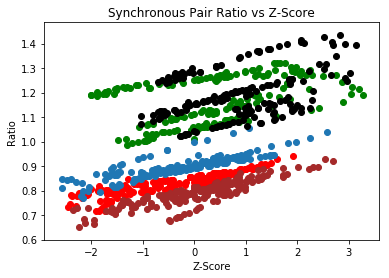

In [7]:
# Select (first 5) Company Pair Ratios vs Z-Scores 
plt.scatter(pairs_table_z_score['AM'], pairs_table['AM'], color="green")
plt.scatter(pairs_table_z_score['APA'], pairs_table['APA'], color="red")
plt.scatter(pairs_table_z_score['APC'], pairs_table['APC'])
plt.scatter(pairs_table_z_score['AR'], pairs_table['AR'], color="black")
plt.scatter(pairs_table_z_score['AXAS'], pairs_table['AXAS'], color="brown")
plt.xlabel("Z-Score")
plt.ylabel("Ratio")
plt.title("Synchronous Pair Ratio vs Z-Score")

In [27]:
z_score_threshold= 20
pairs_indicator = pairs_table_z_score[pairs_table_z_score < z_score_threshold]
pairs_indicator.index = pairs_indicator['date']
del pairs_indicator['date']

for col in pairs_indicator.columns:
    for index, row in pairs_indicator.iterrows():
        if (row[col] < z_score_threshold):
            row[col] =1
        else:                      
            row[col] =0

In [28]:
pairs_indicator.head()

,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2017-05-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-05-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-04-28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-04-27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-04-26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [92]:
y = pairs_indicator.copy()
y[0:253] = np.nan
y.tail()

,AM,APA,APC,AR,AXAS,BBG,CDEV,CEO,CHK,CLR,...,SPY,SWN,UNT,USO,VET,VNOM,WLL,WPX,WTI,XEC
date,,,,,,,,,,,,,,,,,,,,,
2016-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# Looking for indicators within the 2nd to 4th quarter's
for col in pairs_indicator.columns:
    for i in range(62, len(pairs_indicator[col])):
        if (pairs_indicator[col].iloc[i] ==1):
#            temp_series =pairs_table[col].iloc[i-62:i]
#            mean_previous_90 =  (pairs_table[col].iloc[i:i+62]).mean()
            unwind_ratio = pairs_table[col].iloc[i-62]
            setup_ratio = pairs_table[col].iloc[i]
# Setting y = 1 if, at any point within the subsequent 90, the spread reached the average of previous 90 OR unwind>setup
# To iterate on the following line with subsequent versions .... max(temp_series) > mean_previous_90 
            if (unwind_ratio/setup_ratio) > 1:
                y[col].iloc[i] = 1
            else:
                y[col].iloc[i]= 0  

In [34]:
db = sqlite3.connect("classification.sqlite")
y.to_sql('y', db)

In [ ]:
db = sqlite3.connect("classification.sqlite")
y = pd.read_sql_query("SELECT * FROM y", db)

In [ ]:
# Checking percent of cells that fall below 1 STD  ... ~ = 1/2 * (1-.68) .... Seems accurate
#pairs_indicator.sum().sum()/(55*253*.75)
pairs_indicator.ix[190]

In [80]:
all_cells = 53*253
print(all_cells)
three_qtrs = all_cells*.75
print(three_qtrs)

print(y.sum().sum())
# Percentage of increasing spreads nicely approximating 50% for random walk
print(y.sum().sum()/(three_qtrs                     

13409
10056.75
4978.0
0.49499092649215704


In [39]:
# Verifying that num of y appreciation instances is slightly above 50% ...following seems accurate.
y.sum().sum()/pairs_indicator.sum().sum() 

0.5110358279437429

In [115]:
# 1's and 0's showing up with degree that expected .... 
y.sum().sum()

4978.0

In [45]:
pairs_table_z_score.index = pairs_table_z_score['date']
del (pairs_table_z_score['date'])

In [75]:
y_score = y.loc[key, symbol]
y_score

1.0

In [161]:
#### 
df = pd.DataFrame()
index_vals = []
symbols = pairs_table_z_score.columns
for symbol in symbols:
    for key, value in pairs_table_z_score.iterrows():
        index=  (symbol +"_"+key)
        z_score = value[symbol]
        y_score = y.loc[key, symbol]
        correlation = pairs_dict[symbol]
        df= df.append({"Temp_Index" : index, "Z_score": z_score,"Correlation": correlation, "Y":y_score}, ignore_index= True)            

In [162]:
df.index= df["Temp_Index"]
del (df["Temp_Index"])

In [164]:
import statsmodels.api as sm
#lm = sm.OLS.from_formula('ror ~ editda+day_prior_dr+comp_cor+setup_ratio', fundamentals_masked)
lm = sm.OLS.from_formula('Y~Correlation+Z_score', df)
result = lm.fit()

In [165]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 09 May 2017   Prob (F-statistic):           7.03e-71
Time:                        18:14:42   Log-Likelihood:                -6900.3
No. Observations:                9741   AIC:                         1.381e+04
Df Residuals:                    9738   BIC:                         1.383e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.1184      0.036     30.829      

In [ ]:
# End of Preparatory Code ... FOLLOWING BEGINS DECISION TREE CLASSIFIER AND IS WIP

In [172]:
#len(df)*.75
df = df.dropna()
#df_drop_na.tail()
#df.Correlation.describe()


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

train, test = train_test_split(df, test_size= .25, random_state=1)

train_x= train.drop('Y', axis=1)
test_x= test.drop('Y', axis=1)
train_y = train['Y']
test_y = test['Y']

In [179]:
train_x.head()

,Correlation,Z_score
Temp_Index,,
UNT_2017-02-06,0.962042,1.650020
SM_2016-11-11,0.847243,-2.588449
CLR_2016-10-14,0.911420,0.476720
KOS_2016-09-07,0.589896,-2.188365
LPI_2017-03-03,0.899055,1.211093


In [174]:
tree_mean_reversion = DecisionTreeRegressor(min_samples_split= 100, min_samples_leaf = 50)
tree_mean_reversion.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=50, min_samples_split=100,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [182]:
tree_mean_reversion.score(train_x, train_y)
# Why does the following output remain static no matter what I enter for the prediction ?
print(tree_mean_reversion.predict([.5,4]))

[ 0.74509804]


/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [183]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train_x, train_y)
clf.score(train_x, train_y)

0.60438056125941131

In [186]:
# Predicting Buy (1) vs Not Buy (0) for a number of Z-scores and correlations, respectively
print(clf.predict([.9, -2.5]))
print(clf.predict([.7, -1.5]))
print(clf.predict([.5, -.5]))
print(clf.predict([.2,.2]))
print(clf.predict([.1,.0]))

[ 0.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]


/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it cont

In [189]:
import pydotplus
from sklearn import tree
from Ipython.display import Image

dot_data= tree.export_graphviz(tree_mean_reversion, out_file= None,
                              feature_names= train_x.columns,
                              class_names= train_y,
                             filled=True, rounded = True,
                               special_characters=True)
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ImportError: No module named 'Ipython'

In [190]:
reversion = DecisionTreeClassifier(min_samples_split=100, min_samples_leaf=50)
reversion.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [191]:
mean_squared_error(test_y, reversion.predict(test_x))

0.32840722495894908

In [192]:
reversion.score(train_x, train_y)

0.68720054757015747

In [193]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, reversion.predict(test_x))

array([[900, 359],
       [441, 736]])

In [194]:
# This block throwing an error..needs to be fixed
max_tree_depth = 6
decision_tree = gl.decision_tree_classifier.create(train, validation_set=None, 
                                                   target='Y', features=l_features, 
                                                   max_depth=max_tree_depth, verbose=False)

NameError: name 'gl' is not defined

In [195]:
from sklearn.linear_model import LinearRegression, Ridge

lm_reversion=  LinearRegression()
lm_reversion.fit(train_x, train_y)
mean_squared_error(test_y, lm_reversion.predict(test_x))

0.24162712366598563

In [196]:
# What is this score
lm_reversion.score(train_x, train_y)

0.03268330632174854

In [197]:
rg_reversion = Ridge(alpha=0)
rg_reversion.fit(train_x, train_y)
mean_squared_error(test_y, rg_reversion.predict(test_x))

0.24162712366598563

In [199]:
rg_reversion.score(train_x, train_y)

0.03268330632174854

In [ ]:
#model.toDebugString()